In [1]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [2]:
#db params
db_username = 'postgres'
db_password = 'Simulation2024'
db_host = 'localhost'
db_port = '5432'
db_name = 'simulationdatainit'
table_name = 'simulationsiter2'

In [3]:
#creating connection
connection_string = f"postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_string)

In [4]:
#getting df
query = f"SELECT * FROM {table_name}"
df = pd.read_sql(query, engine)
df.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
0,1,0.152642,596.36,1,100.000000,[164.817],"[164.817, 35.18299999999999]",164498,35502
1,2,0.152642,596.36,119,167.942942,"[303.385, 315.221, 628.592, 724.102, 806.739, ...","[303.385, 11.836000000000013, 313.371, 95.5099...",9197842,10802158
2,3,0.152642,596.36,132,151.413053,"[442.85, 479.665, 962.813, 1158.955, 1744.183,...","[442.85, 36.815, 483.14799999999997, 196.14199...",11903116,8096884
3,4,0.152642,596.36,135,148.533279,"[108.47, 287.98900000000003, 315.961, 1252.636...","[108.47, 179.51900000000003, 27.97199999999998...",10269423,9730577
4,5,0.152642,596.36,126,160.189559,"[274.567, 441.795, 646.383, 658.6510000000001,...","[274.567, 167.228, 204.58800000000002, 12.2680...",10901927,9098073


In [5]:
#excluding all initial values to only get the necessary values
df = df[(df['epsilon'] != .152642) & (df['n_zero_square'] != 596.36)]
df.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
13,205,0.01,100.0,0,NaN,[],[],2000000,0
14,211,0.01,100.0,0,NaN,[],[],2000000,0
21,206,0.01,100.0,0,NaN,[],[],2000000,0
29,207,0.01,100.0,0,NaN,[],[],2000000,0
30,212,0.01,100.0,0,NaN,[],[],2000000,0


In [6]:
#specifying that reversals must be greater than 0
df = df[(df['reversal_count'] > 0)]
df.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values
3803,3804,0.019307,104.81,1,1000.000000,[1471.9370000000001],"[1471.9370000000001, 528.0629999999999]",1469780,530220
3902,3903,0.023300,100.00,1,1000.000000,[135.75300000000001],"[135.75300000000001, 1864.247]",133554,1866446
3952,3953,0.025595,100.00,3,821.911000,"[584.367, 630.165, 712.356]","[584.367, 45.798, 1369.835, 1287.644]",664448,1335552
3956,3957,0.025595,120.68,1,1000.000000,[1769.913],"[1769.913, 230.087]",1768315,231685
3957,3958,0.025595,126.49,2,1132.887667,"[285.95300000000003, 601.337]","[285.95300000000003, 1714.047, 1398.663]",1683264,316736


In [7]:
df.shape

(1514, 9)

In [8]:
def any_values_less_than_10(duration_list):
    return any(value < 10 for value in duration_list)

less_than_10 = df['reversal_durations'].apply(any_values_less_than_10)
filtered_df = df[less_than_10]


def sum_values_less_than_10(duration_list):
    return sum(value < 10 for value in duration_list)

def count_values_less_than_3(duration_list):
    return sum(value < 3 for value in duration_list)

counts_less_than_3 = df['reversal_durations'].apply(count_values_less_than_3)
counts_less_than_10 = df['reversal_durations'].apply(sum_values_less_than_10)
df['counts_less_than_3'] = counts_less_than_3
explore_df = df[(df['counts_less_than_3'] > 400)]
df['counts_less_than_10'] = counts_less_than_10

In [9]:
cleaned_3_df = df[(counts_less_than_3 == False)]
cleaned_df = df[(counts_less_than_10 == False)]
cleaned_df

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values,counts_less_than_3,counts_less_than_10
3803,3804,0.019307,104.81,1,1000.000000,[1471.9370000000001],"[1471.9370000000001, 528.0629999999999]",1469780,530220,0,0
3902,3903,0.023300,100.00,1,1000.000000,[135.75300000000001],"[135.75300000000001, 1864.247]",133554,1866446,0,0
3952,3953,0.025595,100.00,3,821.911000,"[584.367, 630.165, 712.356]","[584.367, 45.798, 1369.835, 1287.644]",664448,1335552,0,0
3956,3957,0.025595,120.68,1,1000.000000,[1769.913],"[1769.913, 230.087]",1768315,231685,0,0
3957,3958,0.025595,126.49,2,1132.887667,"[285.95300000000003, 601.337]","[285.95300000000003, 1714.047, 1398.663]",1683264,316736,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5067,5040,0.184207,568.99,22,87.926087,"[48.861000000000004, 70.791, 443.2920000000000...","[48.861000000000004, 21.929999999999993, 372.5...",1357922,642078,0,0
5070,5048,0.184207,828.64,13,144.934429,"[19.153000000000002, 261.993, 344.503, 497.046...","[19.153000000000002, 242.84, 82.50999999999999...",1233552,766448,0,0
5134,5151,0.222300,954.10,18,107.030105,"[67.552, 112.485, 162.562, 408.639, 657.275, 8...","[67.552, 44.93299999999999, 50.07700000000001,...",949870,1050130,0,0
5183,5152,0.222300,1000.00,15,131.910125,"[199.53, 265.192, 591.511, 719.433, 756.546, 8...","[199.53, 65.662, 326.31899999999996, 127.92200...",1311222,688778,0,0


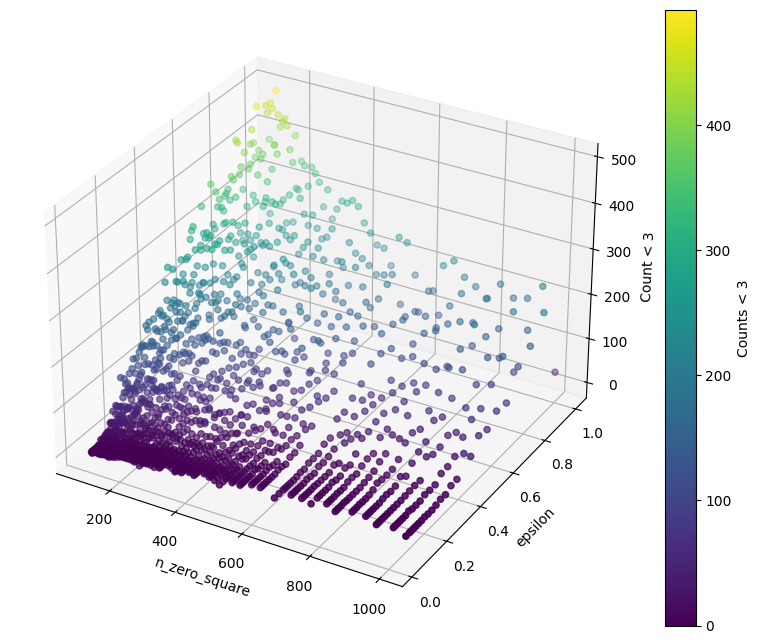

In [10]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')

sc = ax.scatter(
    df['n_zero_square'],
    df['epsilon'],
    df['counts_less_than_3'],
    c = df["counts_less_than_3"],
    cmap = 'viridis',
    marker = 'o'
)

ax.set_xlabel('n_zero_square')
ax.set_ylabel('epsilon')
ax.set_zlabel('Count < 3')

cbar = plt.colorbar(sc)
cbar.set_label('Counts < 3')
plt.show()

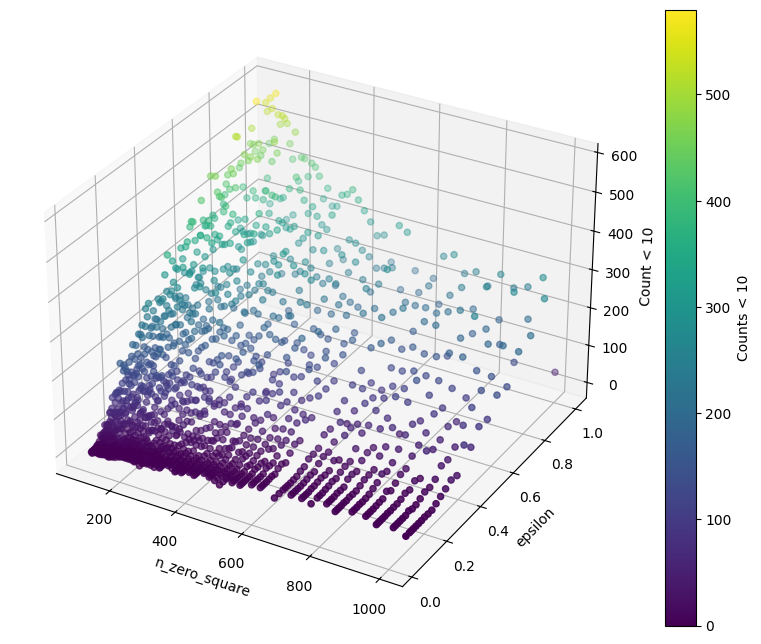

In [11]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')

sc = ax.scatter(
    df['n_zero_square'],
    df['epsilon'],
    df['counts_less_than_10'],
    c = df["counts_less_than_10"],
    cmap = 'viridis',
    marker = 'o'
)

ax.set_xlabel('n_zero_square')
ax.set_ylabel('epsilon')
ax.set_zlabel('Count < 10')

cbar = plt.colorbar(sc)
cbar.set_label('Counts < 10')
plt.show()

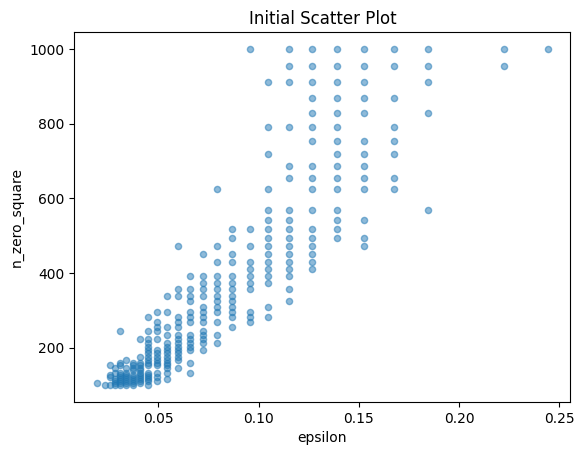

In [12]:
cleaned_df.plot(kind = 'scatter', x = 'epsilon', y = 'n_zero_square', alpha = .5)
plt.title("Initial Scatter Plot")
plt.xlabel('epsilon')
plt.ylabel('n_zero_square')
plt.show()

In [13]:
cleaned_df[(cleaned_df['n_zero_square'] == 1000)]

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values,counts_less_than_3,counts_less_than_10
4703,4702,0.095410,1000.0,1,1000.000000,[148.853],"[148.853, 1851.147]",146851,1853149,0,0
4803,4802,0.115140,1000.0,2,1141.893333,"[356.487, 574.32]","[356.487, 1643.513, 1425.6799999999998]",1780154,219846,0,0
4859,4852,0.126486,1000.0,1,1000.000000,[232.145],"[232.145, 1767.855]",235954,1764046,0,0
4912,4902,0.138950,1000.0,3,562.667000,"[577.344, 738.341, 1749.332]","[577.344, 160.99699999999996, 1261.659, 250.66...",1585316,414684,0,0
4967,4952,0.152642,1000.0,3,544.966250,"[29.487000000000002, 1373.049, 1820.135]","[29.487000000000002, 1343.562, 626.951, 179.865]",482962,1517038,0,0
4970,5002,0.167683,1000.0,9,212.298000,"[157.541, 402.348, 557.017, 678.743, 818.688, ...","[157.541, 244.80700000000002, 154.669000000000...",1285562,714438,0,0
4977,5052,0.184207,1000.0,13,172.364429,"[127.45500000000001, 179.71200000000002, 420.3...","[127.45500000000001, 52.257000000000005, 240.6...",1042966,957034,0,0
5183,5152,0.222300,1000.0,15,131.910125,"[199.53, 265.192, 591.511, 719.433, 756.546, 8...","[199.53, 65.662, 326.31899999999996, 127.92200...",1311222,688778,0,0
5238,5202,0.244205,1000.0,37,53.606526,"[54.689, 117.301, 139.056, 201.64000000000001,...","[54.689, 62.612, 21.75500000000001, 62.584, 23...",902128,1097872,0,0


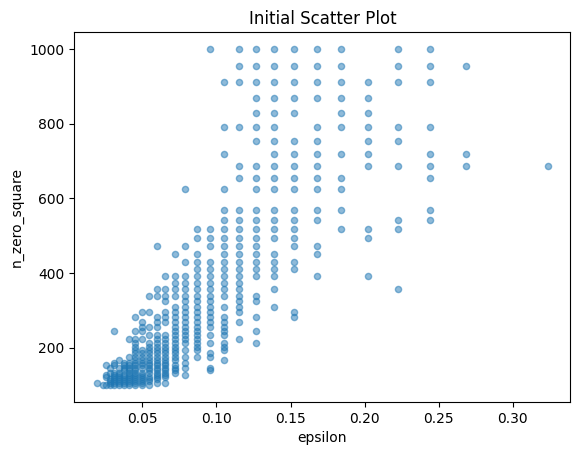

In [14]:
cleaned_3_df.plot(kind = 'scatter', x = 'epsilon', y = 'n_zero_square', alpha = .5)
plt.title("Initial Scatter Plot")
plt.xlabel('epsilon')
plt.ylabel('n_zero_square')
plt.show()

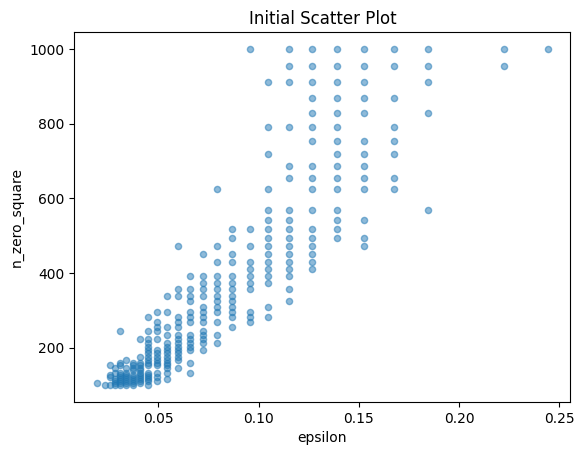

In [15]:
cleaned_df.plot(kind = 'scatter', x = 'epsilon', y = 'n_zero_square', alpha = .5)
plt.title("Initial Scatter Plot")
plt.xlabel('epsilon')
plt.ylabel('n_zero_square')
plt.show()

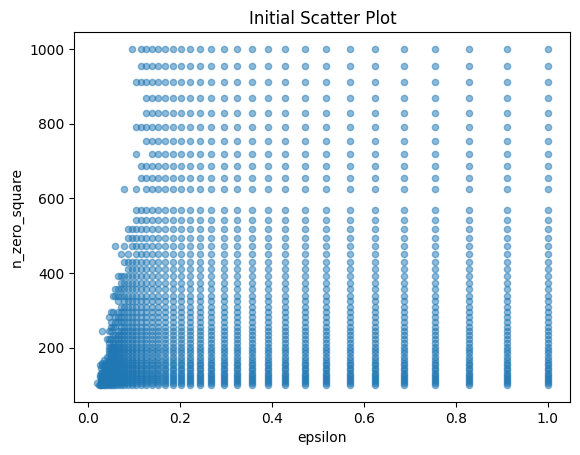

In [16]:
df.plot(kind = 'scatter', x = 'epsilon', y = 'n_zero_square', alpha = .5)
plt.title("Initial Scatter Plot")
plt.xlabel('epsilon')
plt.ylabel('n_zero_square')
plt.show()

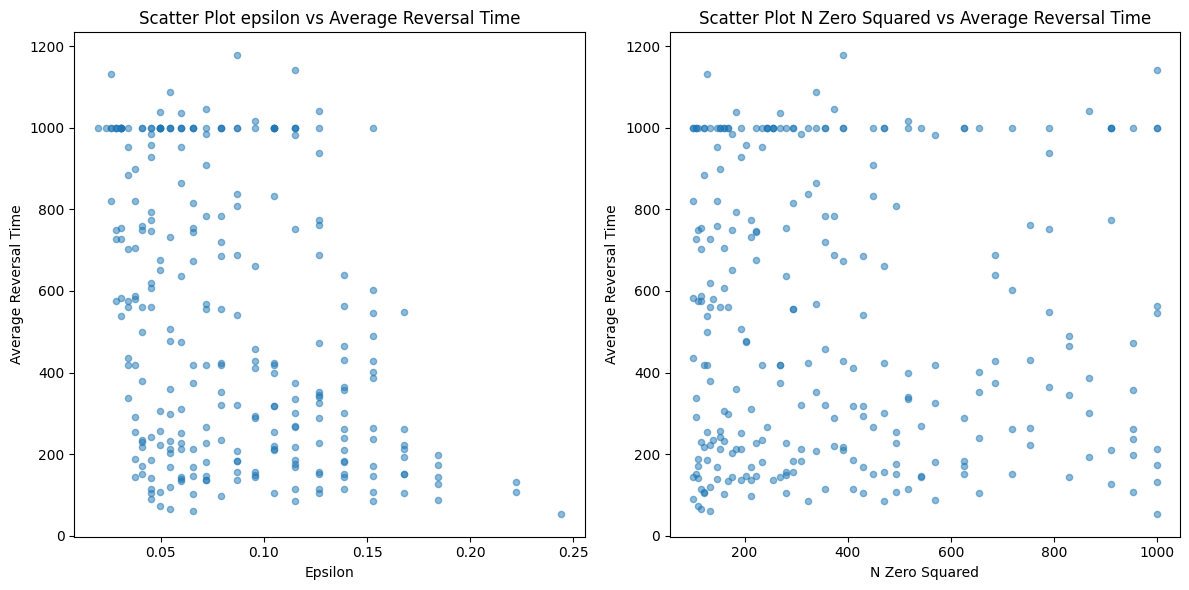

In [17]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
cleaned_df.plot(kind = 'scatter', x = 'epsilon', y = 'average_reversal_time', alpha = .5, ax = axes[0])
axes[0].set_title('Scatter Plot epsilon vs Average Reversal Time')
axes[0].set_xlabel('Epsilon')
axes[0].set_ylabel('Average Reversal Time')

cleaned_df.plot(kind = 'scatter', x = 'n_zero_square', y = 'average_reversal_time', alpha = .5, ax = axes[1])
axes[1].set_title('Scatter Plot N Zero Squared vs Average Reversal Time')
axes[1].set_xlabel('N Zero Squared')
axes[1].set_ylabel('Average Reversal Time')

plt.tight_layout()
plt.show()

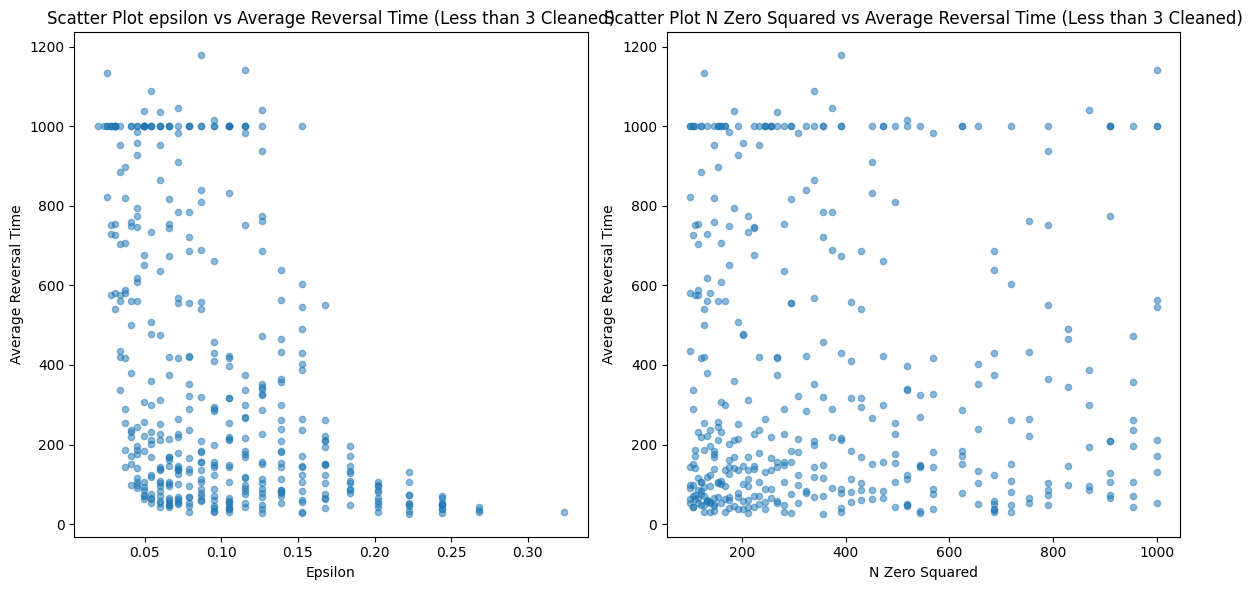

In [18]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
cleaned_3_df.plot(kind = 'scatter', x = 'epsilon', y = 'average_reversal_time', alpha = .5, ax = axes[0])
axes[0].set_title('Scatter Plot epsilon vs Average Reversal Time (Less than 3 Cleaned)')
axes[0].set_xlabel('Epsilon')
axes[0].set_ylabel('Average Reversal Time')

cleaned_3_df.plot(kind = 'scatter', x = 'n_zero_square', y = 'average_reversal_time', alpha = .5, ax = axes[1])
axes[1].set_title('Scatter Plot N Zero Squared vs Average Reversal Time (Less than 3 Cleaned)')
axes[1].set_xlabel('N Zero Squared')
axes[1].set_ylabel('Average Reversal Time')

plt.tight_layout()
plt.show()

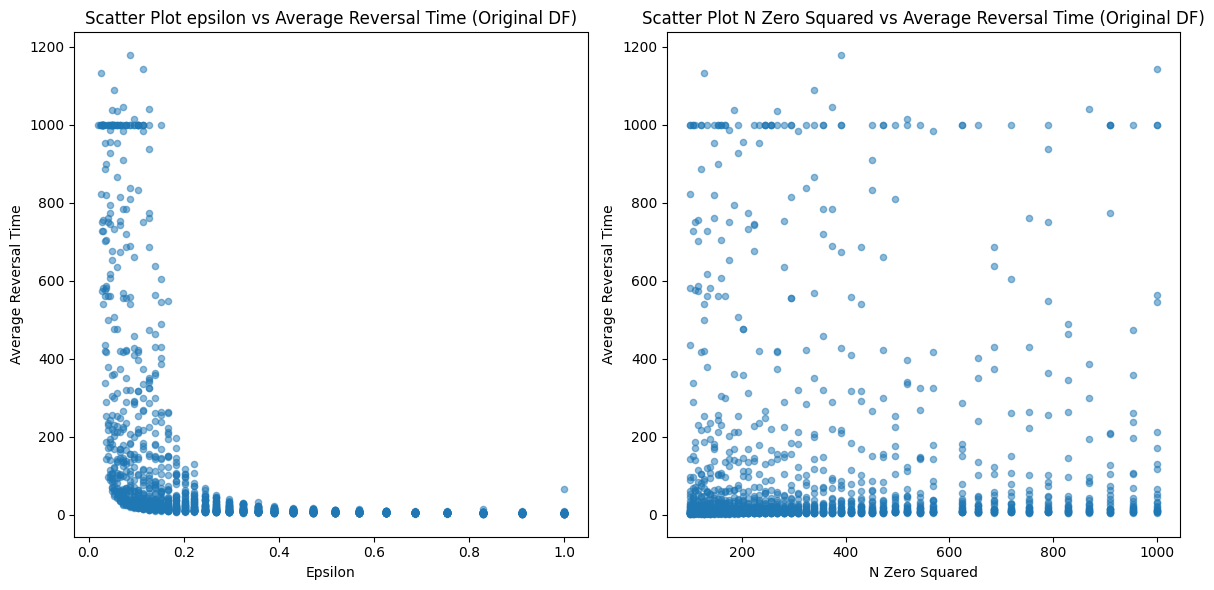

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 6))
df.plot(kind = 'scatter', x = 'epsilon', y = 'average_reversal_time', alpha = .5, ax = axes[0])
axes[0].set_title('Scatter Plot epsilon vs Average Reversal Time (Original DF)')
axes[0].set_xlabel('Epsilon')
axes[0].set_ylabel('Average Reversal Time')

df.plot(kind = 'scatter', x = 'n_zero_square', y = 'average_reversal_time', alpha = .5, ax = axes[1])
axes[1].set_title('Scatter Plot N Zero Squared vs Average Reversal Time (Original DF)')
axes[1].set_xlabel('N Zero Squared')
axes[1].set_ylabel('Average Reversal Time')

plt.tight_layout()
plt.show()

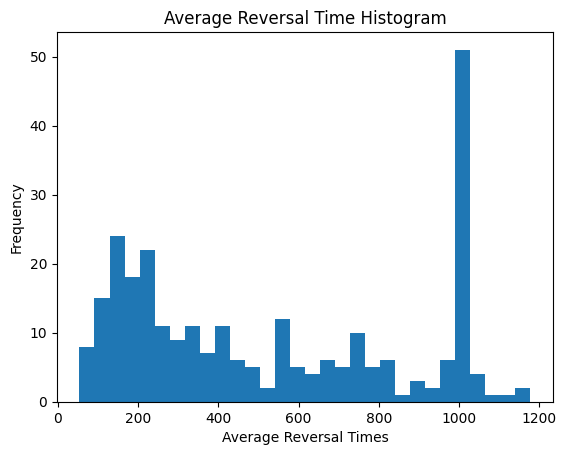

In [20]:
# len(cleaned_df[(cleaned_df['average_reversal_time'] == 1000)])

cleaned_df['average_reversal_time'].plot(kind = 'hist', bins = 30)
plt.title('Average Reversal Time Histogram')
plt.xlabel('Average Reversal Times')
plt.show()

In [21]:
cleaned_df.shape

(273, 11)

In [22]:
cleaned_df.head()

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values,counts_less_than_3,counts_less_than_10
3803,3804,0.019307,104.81,1,1000.000000,[1471.9370000000001],"[1471.9370000000001, 528.0629999999999]",1469780,530220,0,0
3902,3903,0.023300,100.00,1,1000.000000,[135.75300000000001],"[135.75300000000001, 1864.247]",133554,1866446,0,0
3952,3953,0.025595,100.00,3,821.911000,"[584.367, 630.165, 712.356]","[584.367, 45.798, 1369.835, 1287.644]",664448,1335552,0,0
3956,3957,0.025595,120.68,1,1000.000000,[1769.913],"[1769.913, 230.087]",1768315,231685,0,0
3957,3958,0.025595,126.49,2,1132.887667,"[285.95300000000003, 601.337]","[285.95300000000003, 1714.047, 1398.663]",1683264,316736,0,0


In [23]:
cleaned_df[(cleaned_df['average_reversal_time'] > 1000)]

,individual_run_id,epsilon,n_zero_square,reversal_count,average_reversal_time,reversal_times,reversal_durations,positive_values,negative_values,counts_less_than_3,counts_less_than_10
3957,3958,0.025595,126.49,2,1132.887667,"[285.95300000000003, 601.337]","[285.95300000000003, 1714.047, 1398.663]",1683264,316736,0,0
4315,4316,0.049417,184.21,2,1039.029333,"[797.642, 882.912]","[797.642, 1202.358, 1117.088]",1907348,92652,0,0
4380,4379,0.054287,339.32,2,1087.974000,"[702.024, 736.078]","[702.024, 1297.976, 1263.922]",1967565,32435,0,0
4423,4424,0.059636,268.27,2,1035.798667,"[95.411, 892.604]","[95.411, 1904.589, 1107.396]",1202690,797310,0,0
4530,4531,0.071969,372.76,2,1045.311333,"[69.296, 864.066]","[69.296, 1930.704, 1135.934]",1204615,795385,0,0
4602,4632,0.086851,390.69,2,1178.137000,"[44.196, 465.589]","[44.196, 1955.804, 1534.411]",1576842,423158,0,0
4689,4688,0.095410,517.95,2,1015.694333,"[306.135, 952.917]","[306.135, 1693.865, 1047.083]",1353190,646810,0,0
4803,4802,0.115140,1000.00,2,1141.893333,"[356.487, 574.32]","[356.487, 1643.513, 1425.6799999999998]",1780154,219846,0,0
4856,4849,0.126486,868.51,2,1040.557000,"[625.467, 878.3290000000001]","[625.467, 1374.533, 1121.6709999999998]",1745105,254895,0,0


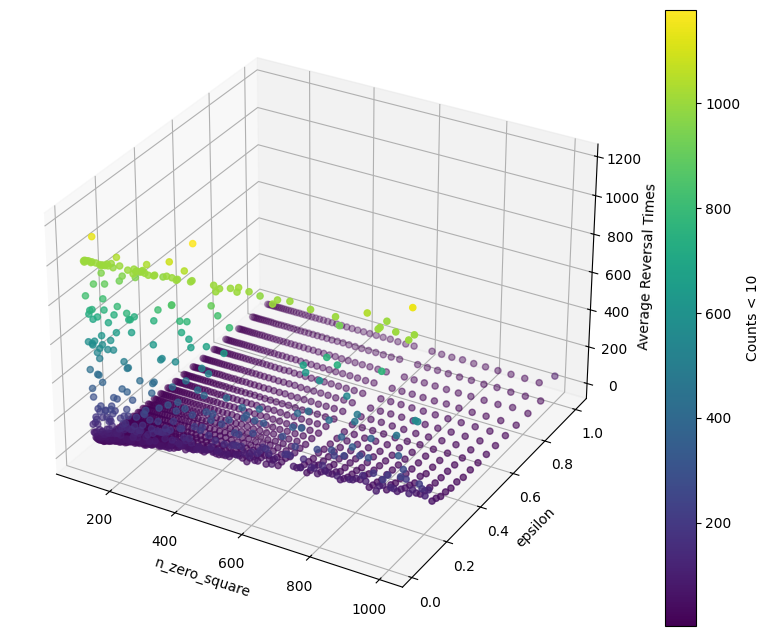

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection = '3d')

sc = ax.scatter(
    df['n_zero_square'],
    df['epsilon'],
    df['average_reversal_time'],
    c = df["average_reversal_time"],
    cmap = 'viridis',
    marker = 'o'
)

ax.set_xlabel('n_zero_square')
ax.set_ylabel('epsilon')
ax.set_zlabel('Average Reversal Times')

cbar = plt.colorbar(sc)
cbar.set_label('Counts < 10')
plt.show()